## Linear Regression Template

In [1]:
# first import group (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# LinearRegression group
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_pickle('golden_data_dummy.pkl')
df

displacement     hp     km  ss_abs  ss_adaptive_cruise_control  \
0            1422.0   66.0  56013     1.0                         0.0   
1            1798.0  141.0  80000     1.0                         0.0   
2            1598.0   85.0  83450     1.0                         0.0   
3            1422.0   66.0  73000     1.0                         0.0   
4            1422.0   66.0  16200     1.0                         0.0   
...             ...    ...    ...     ...                         ...   
15913        1798.0  165.0   1000     1.0                         1.0   
15915        1798.0  165.0   9900     1.0                         1.0   
15916        1997.0  146.0     15     1.0                         1.0   
15917        1997.0  147.0     10     1.0                         0.0   
15918        1798.0  165.0   2095     1.0                         0.0   

       ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
0                         0.0              0.0                    0.0   
1                         0.0              0.0                    0.0   
2                         0.0              0.0                    0.0   
3                         0.0              1.0                    0.0   
4                         0.0              0.0                    0.0   
...                       ...              ...                    ...   
15913                     0.0              0.0                    1.0   
15915                     0.0              0.0                    1.0   
15916                     0.0              0.0                    1.0   
15917                     0.0              0.0                    1.0   
15918                     0.0              0.0                    1.0   

       ss_central_door_lock  ss_central_door_lock_with_remote_control  \
0                       1.0                                       0.0   
1                       1.0                                       1.0   
2                       1.0                                       0.0   
3                       0.0                                       1.0   
4                       1.0                                       0.0   
...                     ...                                       ...   
15913                   1.0                                       0.0   
15915                   1.0                                       0.0   
15916                   1.0                                       0.0   
15917                   0.0                                       0.0   
15918                   0.0                                       0.0   

       ss_daytime_running_lights  ss_driver_drowsiness_detection  \
0                            1.0                             0.0   
1                            1.0                             0.0   
2                            1.0                             0.0   
3                            0.0                             1.0   
4                            0.0                             0.0   
...                          ...                             ...   
15913                        1.0                             0.0   
15915                        1.0                             0.0   
15916                        1.0                             0.0   
15917                        0.0                             0.0   
15918                        1.0                             0.0   

       ss_driver_side_airbag  ss_electronic_stability_control  \
0                        1.0                              1.0   
1                        1.0                              1.0   
2                        1.0                              1.0   
3                        1.0                              1.0   
4                        1.0                              1.0   
...                      ...                              ...   
15913                    1.0                              1.0   
15915                    1.0           

In [5]:
df.shape

(14990, 136)

**1-EDA part**

In [6]:
#Looking up the data
df.tail()

displacement     hp    km  ss_abs  ss_adaptive_cruise_control  \
15913        1798.0  165.0  1000     1.0                         1.0   
15915        1798.0  165.0  9900     1.0                         1.0   
15916        1997.0  146.0    15     1.0                         1.0   
15917        1997.0  147.0    10     1.0                         0.0   
15918        1798.0  165.0  2095     1.0                         0.0   

       ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
15913                     0.0              0.0                    1.0   
15915                     0.0              0.0                    1.0   
15916                     0.0              0.0                    1.0   
15917                     0.0              0.0                    1.0   
15918                     0.0              0.0                    1.0   

       ss_central_door_lock  ss_central_door_lock_with_remote_control  \
15913                   1.0                                       0.0   
15915                   1.0                                       0.0   
15916                   1.0                                       0.0   
15917                   0.0                                       0.0   
15918                   0.0                                       0.0   

       ss_daytime_running_lights  ss_driver_drowsiness_detection  \
15913                        1.0                             0.0   
15915                        1.0                             0.0   
15916                        1.0                             0.0   
15917                        0.0                             0.0   
15918                        1.0                             0.0   

       ss_driver_side_airbag  ss_electronic_stability_control  \
15913                    1.0                              1.0   
15915                    1.0                              1.0   
15916                    1.0                              1.0   
15917                    1.0                              1.0   
15918                    1.0                              1.0   

       ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
15913                           1.0                  0.0            0.0   
15915                           1.0                  0.0            0.0   
15916                           1.0                  0.0            0.0   
15917                           1.0                  0.0            0.0   
15918                           1.0                  0.0            0.0   

       ss_head_airbag  ss_immobilizer  ss_isofix  \
15913             0.0             1.0        1.0   
15915             0.0             1.0        1.0   
15916             0.0             1.0        1.0   
15917             0.0             0.0        1.0   
15918             0.0             1.0        1.0   

       ss_led_daytime_running_lights  ss_led_headlights  \
15913                            1.0                1.0   
15915                            1.0                1.0   
15916                            1.0                1.0   
15917                            0.0                1.0   
15918                            1.0                0.0   

       ss_lane_departure_warning_system  ss_night_view_assist  \
15913                               1.0                   0.0   
15915                               1.0                   0.0   
15916                               1.0                   0.0   
15917                               0.0                   0.0   
15918                               0.0                   0.0   

       ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
15913                       1.0                1.0             0.0   
15915                       1.0                1.0             0.0   
15916                       1.0                1.0             0.0   
15917                       1.0                1.0             0.0   
15918                       1.0     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [8]:
df.isnull().any().unique()

array([False])

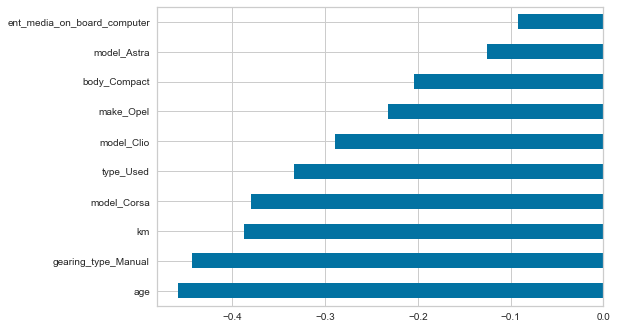

In [12]:
corr_price = df.corr()['price']
corr_price.sort_values().head(10).plot.barh()

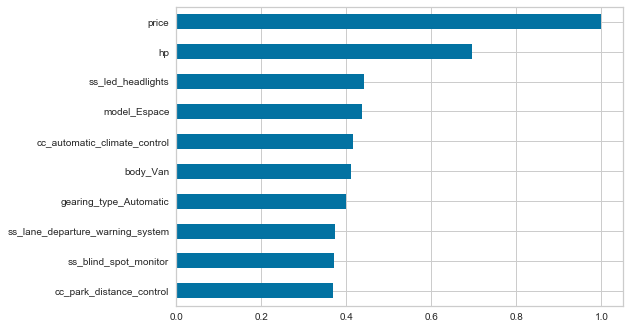

In [11]:
corr_price.sort_values().tail(10).plot.barh()

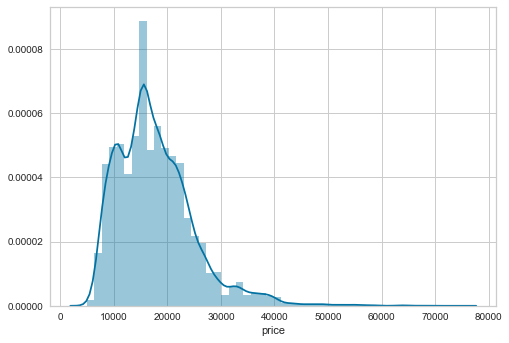

In [13]:
sns.distplot(df.price)

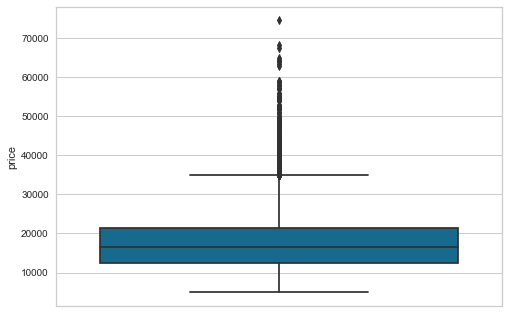

In [15]:
sns.boxplot(df.price, orient='v')

In [16]:
df.describe()

displacement            hp             km        ss_abs  \
count  14990.000000  14990.000000   14990.000000  14990.000000   
mean    1432.258843     88.231744   33894.105203      0.949767   
std      271.764876     26.617304   37284.577857      0.218434   
min      890.000000     40.000000       0.000000      0.000000   
25%     1229.000000     66.000000    5000.000000      1.000000   
50%     1461.000000     85.000000   22487.000000      1.000000   
75%     1598.000000    100.000000   49264.500000      1.000000   
max     2967.000000    294.000000  317000.000000      1.000000   

       ss_adaptive_cruise_control  ss_adaptive_headlights  ss_alarm_system  \
count                14990.000000            14990.000000     14990.000000   
mean                     0.080187                0.133422         0.126484   
std                      0.271591                0.340042         0.332405   
min                      0.000000                0.000000         0.000000   
25%                      0.000000                0.000000         0.000000   
50%                      0.000000                0.000000         0.000000   
75%                      0.000000                0.000000         0.000000   
max                      1.000000                1.000000         1.000000   

       ss_blind_spot_monitor  ss_central_door_lock  \
count           14990.000000          14990.000000   
mean                0.082188              0.859239   
std                 0.274660              0.347786   
min                 0.000000              0.000000   
25%                 0.000000              1.000000   
50%                 0.000000              1.000000   
75%                 0.000000              1.000000   
max                 1.000000              1.000000   

       ss_central_door_lock_with_remote_control  ss_daytime_running_lights  \
count                              14990.000000               14990.000000   
mean                                   0.155704                   0.707605   
std                                    0.362586                   0.454878   
min                                    0.000000                   0.000000   
25%                                    0.000000                   0.000000   
50%                                    0.000000                   1.000000   
75%                                    0.000000                   1.000000   
max                                    1.000000                   1.000000   

       ss_driver_drowsiness_detection  ss_driver_side_airbag  \
count                    14990.000000           14990.000000   
mean                         0.032021               0.932755   
std                          0.176063               0.250454   
min                          0.000000               0.000000   
25%                          0.000000               1.000000   
50%                          0.000000               1.000000   
75%                          0.000000               1.000000   
max                          1.000000               1.000000   

       ss_electronic_stability_control  ss_emergency_brake_assistant  \
count                     14990.000000                  14990.000000   
mean                          0.888726                      0.194730   
std                           0.314482                      0.396006   
min                           0.000000                      0.000000   
25%                           1.000000                      0.000000   
50%                           1.000000                      0.000000   
75%                           1.000000                      0.000000   
max                           1.000000                      1.000000   

       ss_emergency_system  ss_fog_lights  ss_head_airbag  ss_immobilizer  \
count         14990.000000   14990.000000    14990.000000    14990.000000   
mean              0.095197       0.568312        0.142028        0.710207   
std               0.293496       0.495328        0.349091     

**2-Split to train**

In [17]:
X=df.drop(['price'], axis=1)

In [18]:
y=df.price

In [19]:
X.shape

(14990, 135)

In [20]:
y.shape

(14990,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**3-Creating Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

**4-Training Linear Regression**

In [26]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**5-Model Evaluation**

In [27]:
lm.intercept_

12485.995547262904

In [28]:
coeff_df = pd.DataFrame(data=lm.coef_, index=X.columns,columns=['Coefficient'])

In [29]:
coeff_df.T

displacement        hp        km     ss_abs  \
Coefficient     -0.986023  97.10494 -0.037616 -88.329118   

             ss_adaptive_cruise_control  ss_adaptive_headlights  \
Coefficient                   56.699454              231.972147   

             ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
Coefficient        54.053899            -510.667678           -335.519039   

             ss_central_door_lock_with_remote_control  \
Coefficient                                 88.984183   

             ss_daytime_running_lights  ss_driver_drowsiness_detection  \
Coefficient                -274.403069                      121.404956   

             ss_driver_side_airbag  ss_electronic_stability_control  \
Coefficient            -229.890361                      -379.098164   

             ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
Coefficient                     22.953339          -812.105319    -198.824367   

             ss_head_airbag  ss_immobilizer   ss_isofix  \
Coefficient      -62.775271     -215.567613 -287.465592   

             ss_led_daytime_running_lights  ss_led_headlights  \
Coefficient                    -219.880575         573.273089   

             ss_lane_departure_warning_system  ss_night_view_assist  \
Coefficient                        753.093729            164.285748   

             ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
Coefficient                 522.75418        -478.109121     -683.665375   

             ss_side_airbag  ss_tire_pressure_monitoring_system  \
Coefficient       241.69686                           82.790706   

             ss_traction_control  ss_traffic_sign_recognition  \
Coefficient           217.168886                     9.877338   

             ss_xenon_headlights  consumption_comb  inspection_new  \
Coefficient          -314.809545         94.091083     -100.503947   

                     age  ent_media_bluetooth  ent_media_cd_player  \
Coefficient -1541.885316          -499.534875             78.01297   

             ent_media_digital_radio  ent_media_hands_free_equipment  \
Coefficient               980.072622                        -67.6202   

             ent_media_mp3  ent_media_on_board_computer  ent_media_radio  \
Coefficient     -75.120749                  -122.568683       374.441364   

             ent_media_sound_system  ent_media_television  ent_media_usb  \
Coefficient             -185.490498          -1170.242441    -192.159981   

             nr_of_doors  nr_of_seats   warranty  cc_air_conditioning  \
Coefficient   323.559052    14.352075 -87.333944           422.891156   

             cc_air_suspension  cc_armrest  cc_automatic_climate_control  \
Coefficient        -521.132781   33.868369                    291.061486   

             cc_auxiliary_heating  cc_cruise_control  cc_electric_starter  \
Coefficient           -181.343382         189.222354         -1983.076487   

             cc_electric_tailgate  cc_electrical_side_mirrors  \
Coefficient            102.111183                  137.309452   

             cc_electrically_adjustable_seats  \
Coefficient                        296.076525   

             cc_electrically_heated_windshield  cc_heads_up_display  \
Coefficient                         620.520829          2142.914326   

             cc_heated_steering_wheel  cc_hill_holder  \
Coefficient                416.219668      236.677659   

             cc_keyless_central_door_lock  cc_leather_seats  \
Coefficient                    312.206193       -500.462787   

             cc_leather_steering_wheel  cc_light_sensor  cc_lumbar_support  \
Coefficient                   93.81113       135.810434        -112.765086   

             cc_massage_seats  cc_multi_function_steering_wheel  \
Coefficient        429.084121                         125.55335   

             cc_navigation_system  cc_panorama_roof  cc_park_distance_control  \
Coefficient            424.704809         48

**6-Prediction and evaluation metrics**

In [30]:
y_pred = lm.predict(X_test)

In [31]:
eval_metrics(y_test, y_pred) 

r2_score: 0.884817939647888 
 mae: 1680.9128627138998 
 mse: 5855398.603112239 
 rmse: 2419.793090971259


**r2 score :135 features ile y deki degisimi 88% oraninda aciklanabilir
mae : ortalama 1680 euro hata ile bildim
mse : rmse i bulmak icin kullanilir
rmse : model kiyaslamasi icin kullanilir, hangisi dusukse o modeli kullan

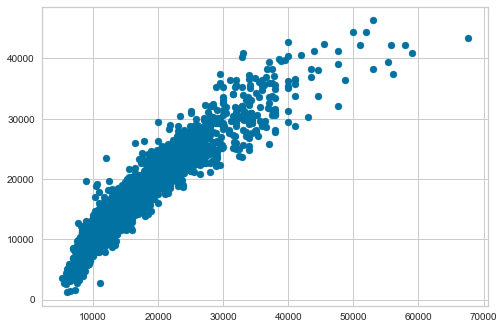

In [32]:
plt.scatter(y_test, y_pred)

**7-Scoring and comparison**

In [36]:
lm.score(X_test, y_test)

0.884817939647888

In [33]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
comparison_df = pd.DataFrame(comparison).round(1)

In [35]:
comparison_df.sort_values('Diff', ascending=True).sample(10)

Actual  Model prediction    Diff  Diff %
6830    12500           12195.2  -304.8    -2.4
8248    12950            8994.6 -3955.4   -30.5
10001   16350           20266.9  3916.9    24.0
15915   39885           40467.6   582.6     1.5
6451    10979            8119.5 -2859.5   -26.0
3735    21950           23167.2  1217.2     5.5
9605     9500            9415.1   -84.9    -0.9
133     18333           18495.3   162.3     0.9
4983    21680           20438.4 -1241.6    -5.7
3211    13500           14189.5   689.5     5.1

**9-Cross Validation**

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
print(f"Accuracy: {accuracies.mean():0.4f} (+/- {accuracies.std()*2:0.2f})")

Accuracy: 0.8884 (+/- 0.01)


In [38]:
accuracies

array([0.88194192, 0.89267637, 0.895317  , 0.88821373, 0.88403344])

**8-Yellowbrick viz score**

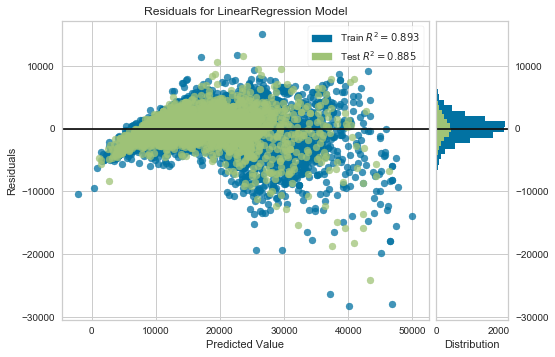

In [39]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(lm)   
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()                # Finalize and render the figure

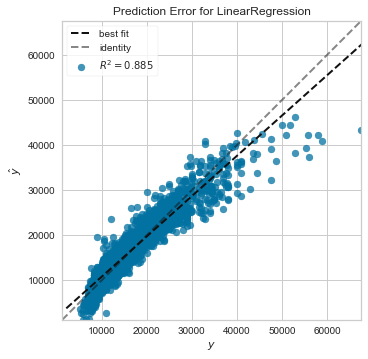

In [40]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(lm) 
viz.fit(X_train, y_train) # Fit the training data to the visualizer
viz.score(X_test, y_test) # Evaluate the model on the test data
viz.show()

## Ridge Model

**2-Creating Ridge Regression**

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [42]:
ridge_model = Ridge(normalize=True)

**3-Training Ridge Regression**

In [43]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

**6-Model Evaluation**

In [44]:
ridge_model.intercept_

10236.41397687652

In [45]:
coeff_df_ridge = pd.DataFrame(data=ridge_model.coef_, index=X.columns,columns=['Coefficient'])

In [46]:
coeff_df_ridge.T

displacement         hp        km      ss_abs  \
Coefficient      1.112822  37.212802 -0.022219 -343.210481   

             ss_adaptive_cruise_control  ss_adaptive_headlights  \
Coefficient                    414.0456              169.914509   

             ss_alarm_system  ss_blind_spot_monitor  ss_central_door_lock  \
Coefficient        96.653545             349.272685            -363.39794   

             ss_central_door_lock_with_remote_control  \
Coefficient                               -249.805876   

             ss_daytime_running_lights  ss_driver_drowsiness_detection  \
Coefficient                -266.265832                      172.426736   

             ss_driver_side_airbag  ss_electronic_stability_control  \
Coefficient             -55.229555                      -141.345906   

             ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
Coefficient                    370.171764          -426.735773    -410.161176   

             ss_head_airbag  ss_immobilizer   ss_isofix  \
Coefficient     -149.178092     -101.792426 -375.078602   

             ss_led_daytime_running_lights  ss_led_headlights  \
Coefficient                     -97.758236         817.416837   

             ss_lane_departure_warning_system  ss_night_view_assist  \
Coefficient                        612.596443             15.748357   

             ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
Coefficient                 52.618033        -299.851177     -371.991276   

             ss_side_airbag  ss_tire_pressure_monitoring_system  \
Coefficient      120.759512                          -116.62035   

             ss_traction_control  ss_traffic_sign_recognition  \
Coefficient           186.835493                    302.37409   

             ss_xenon_headlights  consumption_comb  inspection_new  \
Coefficient           350.058902        338.317876      -170.56375   

                    age  ent_media_bluetooth  ent_media_cd_player  \
Coefficient -819.032418           -345.34463          -194.882565   

             ent_media_digital_radio  ent_media_hands_free_equipment  \
Coefficient               638.573274                       26.946154   

             ent_media_mp3  ent_media_on_board_computer  ent_media_radio  \
Coefficient     -141.38218                  -496.711041       142.045489   

             ent_media_sound_system  ent_media_television  ent_media_usb  \
Coefficient              -52.070767           -994.204452    -311.948476   

             nr_of_doors  nr_of_seats    warranty  cc_air_conditioning  \
Coefficient   319.516955   333.349558  130.917855            38.639115   

             cc_air_suspension  cc_armrest  cc_automatic_climate_control  \
Coefficient         -33.867482    332.4841                    609.087843   

             cc_auxiliary_heating  cc_cruise_control  cc_electric_starter  \
Coefficient           -227.882576         103.946313         -2166.590948   

             cc_electric_tailgate  cc_electrical_side_mirrors  \
Coefficient            459.552915                 -267.345022   

             cc_electrically_adjustable_seats  \
Coefficient                        448.295137   

             cc_electrically_heated_windshield  cc_heads_up_display  \
Coefficient                         288.845048          1541.110621   

             cc_heated_steering_wheel  cc_hill_holder  \
Coefficient                    14.918      -87.804423   

             cc_keyless_central_door_lock  cc_leather_seats  \
Coefficient                     223.45523        -251.73908   

             cc_leather_steering_wheel  cc_light_sensor  cc_lumbar_support  \
Coefficient                 113.823411       237.810845         -30.522555   

             cc_massage_seats  cc_multi_function_steering_wheel  \
Coefficient        942.239964                          -6.08885   

             cc_navigation_system  cc_panorama_roof  cc_park_distance_control  \
Coefficient            336.719175       

**7-Prediction and evaluation metrics**

In [47]:
y_pred = ridge_model.predict(X_test)

In [48]:
eval_metrics(y_test, y_pred)

r2_score: 0.8216024253818084 
 mae: 1995.1055955996674 
 mse: 9069024.343067473 
 rmse: 3011.4820841352307


In [49]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [50]:
ridge_model.alpha

1.0

In [51]:
alpha_space = np.linspace(.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [52]:
ridgecv = RidgeCV(alphas=alpha_space, normalize=True, cv=5)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [53]:
ridgecv.alpha_

0.1

In [54]:
dir(ridgecv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha_',
 'alphas',
 'coef_',
 'cv',
 'fit',
 'fit_intercept',
 'gcv_mode',
 'get_params',
 'intercept_',
 'normalize',
 'predict',
 'score',
 'scoring',
 'set_params',
 'store_cv_values']

In [55]:
ridge_model = Ridge(alpha=0.1, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [56]:
eval_metrics(y_test, y_pred)

r2_score: 0.8798536457436081 
 mae: 1685.3571745392803 
 mse: 6107763.593838211 
 rmse: 2471.3890009139013


## Lasso Model

**1-Creating Lasso Regression**

In [57]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [58]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8802509361333924 
 mae: 1700.9989890946274 
 mse: 6087566.927914177 
 rmse: 2467.2995213216773


In [61]:
lassocv = RidgeCV(alphas=alpha_space, normalize=False, cv=5)
lassocv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [62]:
lassocv.alpha_

12.16060606060606

In [63]:
lasso_model = Lasso(lassocv.alpha_, normalize=False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [64]:
eval_metrics(y_test, y_pred)

r2_score: 0.8846068285179802 
 mae: 1689.8367626581078 
 mse: 5866130.654712845 
 rmse: 2422.0096314244593


In [65]:
# without normalization, alpha is greater and score is better

In [94]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_, 'corr': corr_price.drop('price')})
feature_coef['corr_abs']= abs (feature_coef['corr'])
feature_coef.sort_values(by='corr_abs', ascending=False, ).head(20)

features  \
hp                                                                          hp   
age                                                                        age   
gearing_type_Manual                                        gearing_type_Manual   
ss_led_headlights                                            ss_led_headlights   
model_Espace                                                      model_Espace   
cc_automatic_climate_control                      cc_automatic_climate_control   
body_Van                                                              body_Van   
gearing_type_Automatic                                  gearing_type_Automatic   
km                                                                          km   
model_Corsa                                                        model_Corsa   
ss_lane_departure_warning_system              ss_lane_departure_warning_system   
ss_blind_spot_monitor                                    ss_blind_spot_monitor   
cc_park_distance_control                              cc_park_distance_control   
ss_traffic_sign_recognition                        ss_traffic_sign_recognition   
cc_rain_sensor                                                  cc_rain_sensor   
cc_parking_assist_system_camera                cc_parking_assist_system_camera   
type_Used                                                            type_Used   
cc_parking_assist_system_sensors_front  cc_parking_assist_system_sensors_front   
cc_heads_up_display                                        cc_heads_up_display   
ss_emergency_brake_assistant                      ss_emergency_brake_assistant   

                                               coef      corr  corr_abs  
hp                                       105.976261  0.696620  0.696620  
age                                    -1579.371886 -0.458475  0.458475  
gearing_type_Manual                    -1637.525927 -0.443354  0.443354  
ss_led_headlights                        581.402653  0.442480  0.442480  
model_Espace                            4887.686002  0.437672  0.437672  
cc_automatic_climate_control             350.947429  0.415296  0.415296  
body_Van                                1429.303543  0.411899  0.411899  
gearing_type_Automatic                     0.000000  0.398715  0.398715  
km                                        -0.037703 -0.387911  0.387911  
model_Corsa                            -1259.510192 -0.379704  0.379704  
ss_lane_departure_warning_system         749.003176  0.372215  0.372215  
ss_blind_spot_monitor                     -0.000000  0.369862  0.369862  
cc_park_distance_control                 368.641885  0.367997  0.367997  
ss_traffic_sign_recognition                0.000000  0.345254  0.345254  
cc_rain_sensor                           -55.290171  0.344755  0.344755  
cc_parking_assist_system_camera            0.000000  0.336499  0.336499  
type_Used                               -620.312275 -0.333761  0.333761  
cc_parking_assist_system_sensors_front   148.210878  0.332361  0.332361  
cc_heads_up_display                     1896.567114  0.324104  0.324104  
ss_emergency_brake_assistant               2.923811  0.321810  0.321810

In [67]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

81

## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf_reg = RandomForestRegressor()

In [98]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
y_pred = rf_reg.predict(X_test)

In [100]:
eval_metrics(y_test, y_pred)

r2_score: 0.9583392762229743 
 mae: 860.5992411853575 
 mse: 2117865.7775604525 
 rmse: 1455.288898315538


In [101]:
cv_scores = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=3)
cv_scores.mean()

0.9497271485857358

### RF Feature Importance

In [102]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)

In [103]:
importance.sort_values(by="importance", ascending = False).head(10)

importance
hp                          0.441400
age                         0.192967
km                          0.071491
model_Espace                0.063299
make_Audi                   0.060279
gearing_type_Manual         0.020261
displacement                0.018467
cc_park_distance_control    0.018282
model_Astra                 0.010209
consumption_comb            0.009398

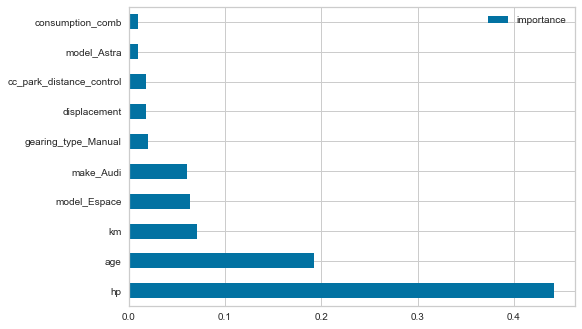

In [104]:
importance.sort_values(by="importance", ascending = False).head(10).plot.barh()

In [105]:
df2=pd.read_pickle('golden_data_not_dummy.pkl')
df2.head()

displacement  make model     hp     km  ss_abs  ss_adaptive_cruise_control  \
0        1422.0  Audi    A1   66.0  56013     1.0                         0.0   
1        1798.0  Audi    A1  141.0  80000     1.0                         0.0   
2        1598.0  Audi    A1   85.0  83450     1.0                         0.0   
3        1422.0  Audi    A1   66.0  73000     1.0                         0.0   
4        1422.0  Audi    A1   66.0  16200     1.0                         0.0   

   ss_adaptive_headlights  ss_alarm_system  ss_blind_spot_monitor  \
0                     0.0              0.0                    0.0   
1                     0.0              0.0                    0.0   
2                     0.0              0.0                    0.0   
3                     0.0              1.0                    0.0   
4                     0.0              0.0                    0.0   

   ss_central_door_lock  ss_central_door_lock_with_remote_control  \
0                   1.0                                       0.0   
1                   1.0                                       1.0   
2                   1.0                                       0.0   
3                   0.0                                       1.0   
4                   1.0                                       0.0   

   ss_daytime_running_lights  ss_driver_drowsiness_detection  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             1.0   
4                        0.0                             0.0   

   ss_driver_side_airbag  ss_electronic_stability_control  \
0                    1.0                              1.0   
1                    1.0                              1.0   
2                    1.0                              1.0   
3                    1.0                              1.0   
4                    1.0                              1.0   

   ss_emergency_brake_assistant  ss_emergency_system  ss_fog_lights  \
0                           0.0                  0.0            1.0   
1                           0.0                  0.0            0.0   
2                           0.0                  0.0            0.0   
3                           0.0                  1.0            0.0   
4                           0.0                  0.0            1.0   

   ss_head_airbag  ss_immobilizer  ss_isofix  ss_led_daytime_running_lights  \
0             0.0             1.0        1.0                            0.0   
1             1.0             1.0        1.0                            0.0   
2             0.0             1.0        1.0                            0.0   
3             1.0             1.0        1.0                            0.0   
4             0.0             1.0        1.0                            0.0   

   ss_led_headlights  ss_lane_departure_warning_system  ss_night_view_assist  \
0                0.0                               0.0                   0.0   
1                0.0                               0.0                   0.0   
2                0.0                               0.0                   0.0   
3                0.0                               0.0                   0.0   
4                0.0                               0.0                   0.0   

   ss_passenger_side_airbag  ss_power_steering  ss_rear_airbag  \
0                       1.0                1.0             0.0   
1                       1.0                1.0             0.0   
2                       1.0                1.0             0.0   
3                       1.0                1.0             0.0   
4                       1.0                1.0             0.0   

   ss_side_airbag  ss_tire_pressure_monitoring_system  ss_traction_control  \
0             1.0                                 1.0                  1.0  

In [106]:
df2.shape

(14994, 98)

### Feature Selection w/RF

In [107]:
new_list = ['age', 'model', 'hp', 'km']

In [109]:
X = df2[new_list]
y = df2['price']
X.head()

age model     hp     km
0    3    A1   66.0  56013
1    2    A1  141.0  80000
2    3    A1   85.0  83450
3    3    A1   66.0  73000
4    3    A1   66.0  16200

In [113]:
X = pd.get_dummies(X)
X.sample(10)

age     hp     km  model_A1  model_A2  model_A3  model_Astra  \
14669    0   56.0   2095         0         0         0            0   
9974     0   66.0     51         0         0         0            0   
12227    1  121.0  28800         0         0         0            0   
12198    1  103.0  24000         0         0         0            0   
7321     1   81.0  18039         0         0         0            1   
9116     2   70.0  89000         0         0         0            0   
11427    2  125.0  29549         0         0         0            0   
4882     1   85.0  19467         0         0         1            0   
13218    2   87.0  75161         0         0         0            0   
11358    2  121.0  15800         0         0         0            0   

       model_Clio  model_Corsa  model_Espace  model_Insignia  
14669           1            0             0               0  
9974            0            1             0               0  
12227           0            0             0               1  
12198           0            0             0               1  
7321            0            0             0               0  
9116            0            1             0               0  
11427           0            0             0               1  
4882            0            0             0               0  
13218           1            0             0               0  
11358           0            0             0               1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [114]:
rf_reg = RandomForestRegressor()

In [115]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
y_pred = rf_reg.predict(X_test)

In [117]:
eval_metrics(y_test, y_pred)

r2_score: 0.9013596925993954 
 mae: 1451.158661540248 
 mse: 5207561.500951971 
 rmse: 2282.0082166705647


In [128]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (14994, 98)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  83
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    97 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Regression VISUALIZATION Started #####################
Number of variables = 97 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 92 Categorical vars selected 
  

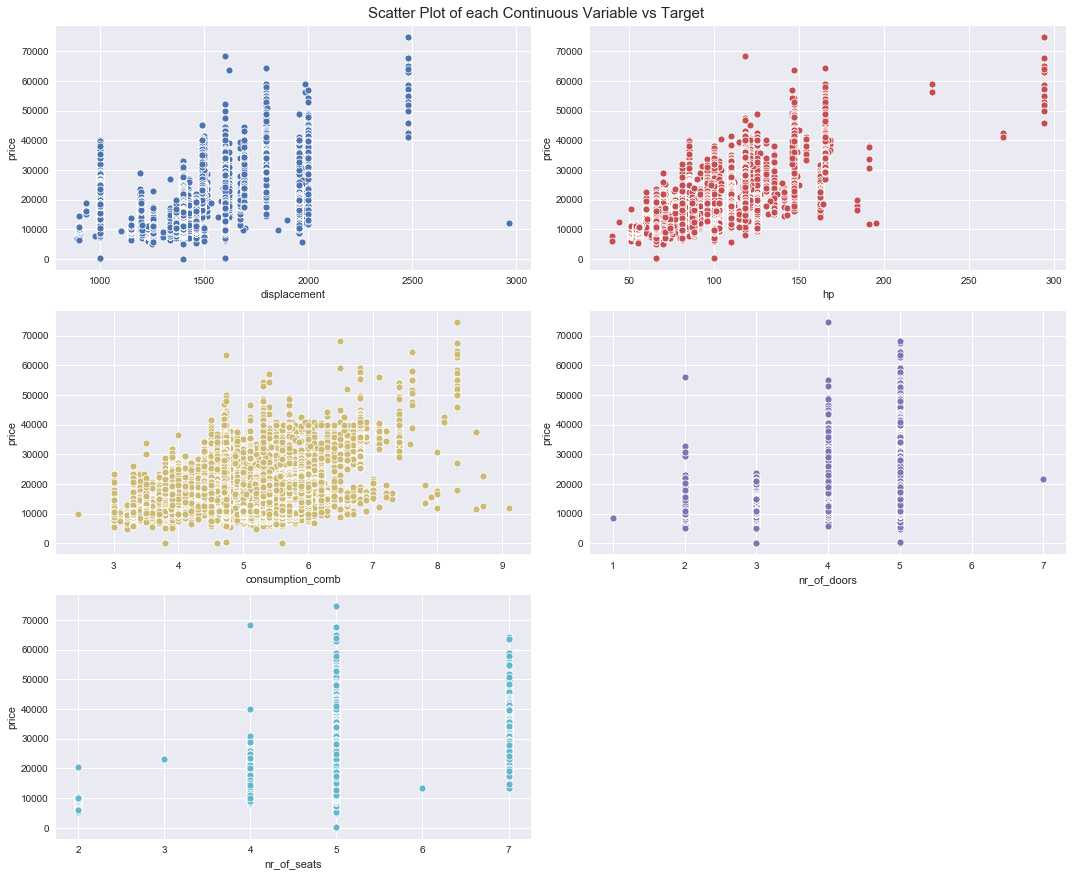

Number of All Scatter Plots = 15


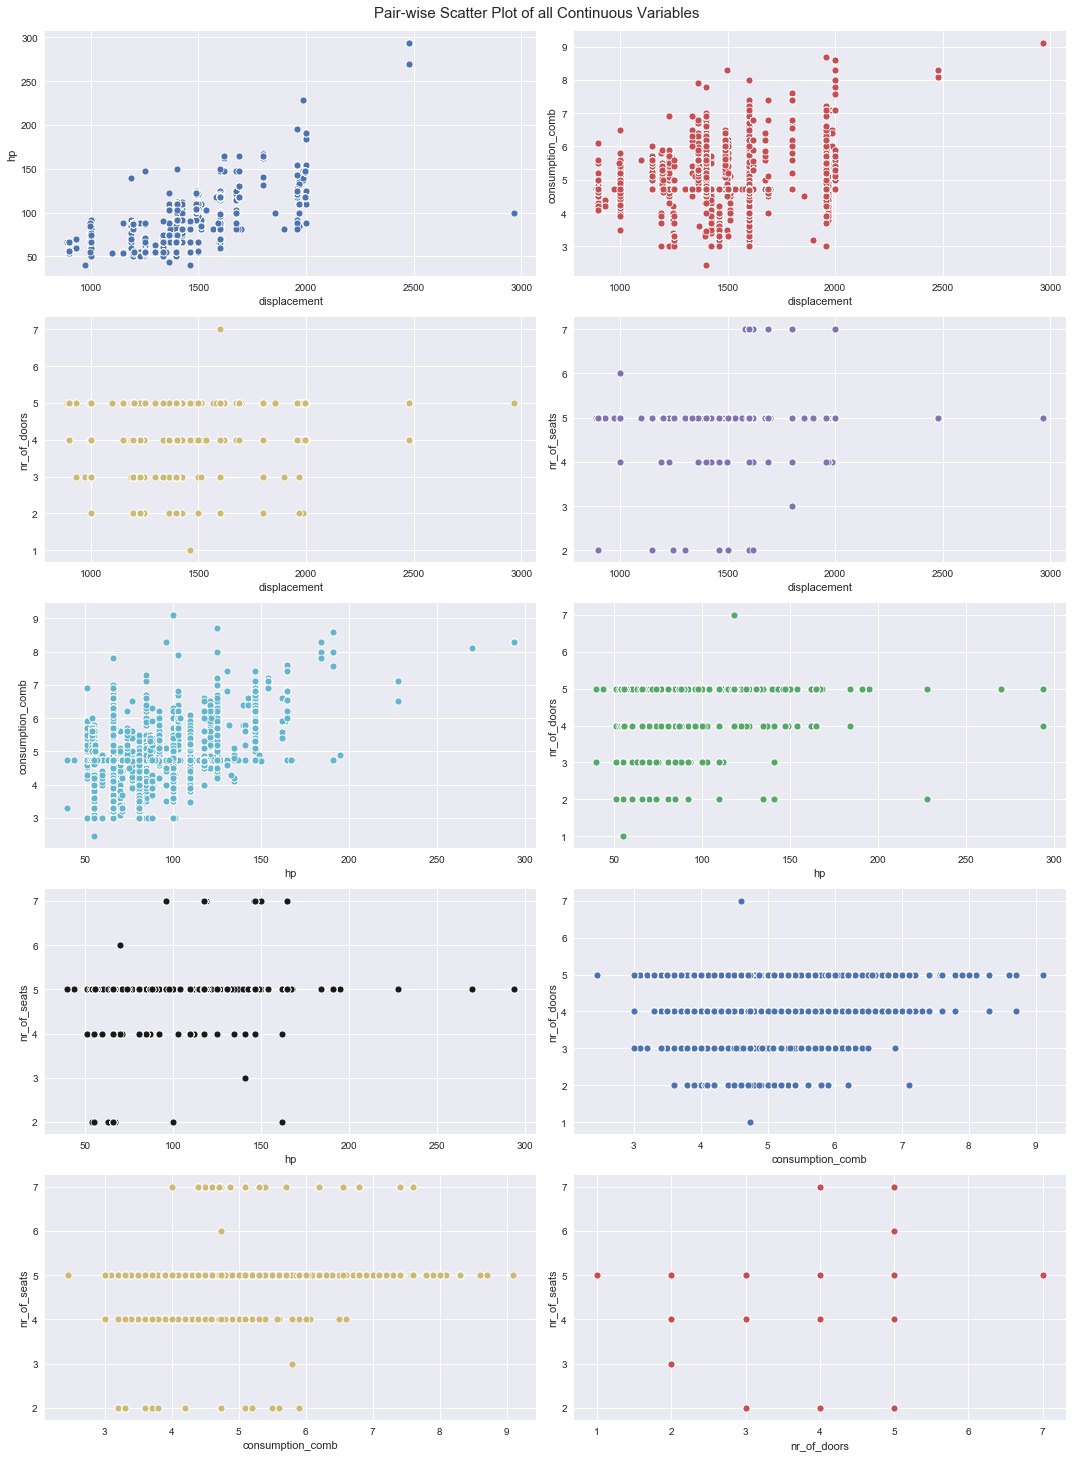

Could not draw Distribution Plots


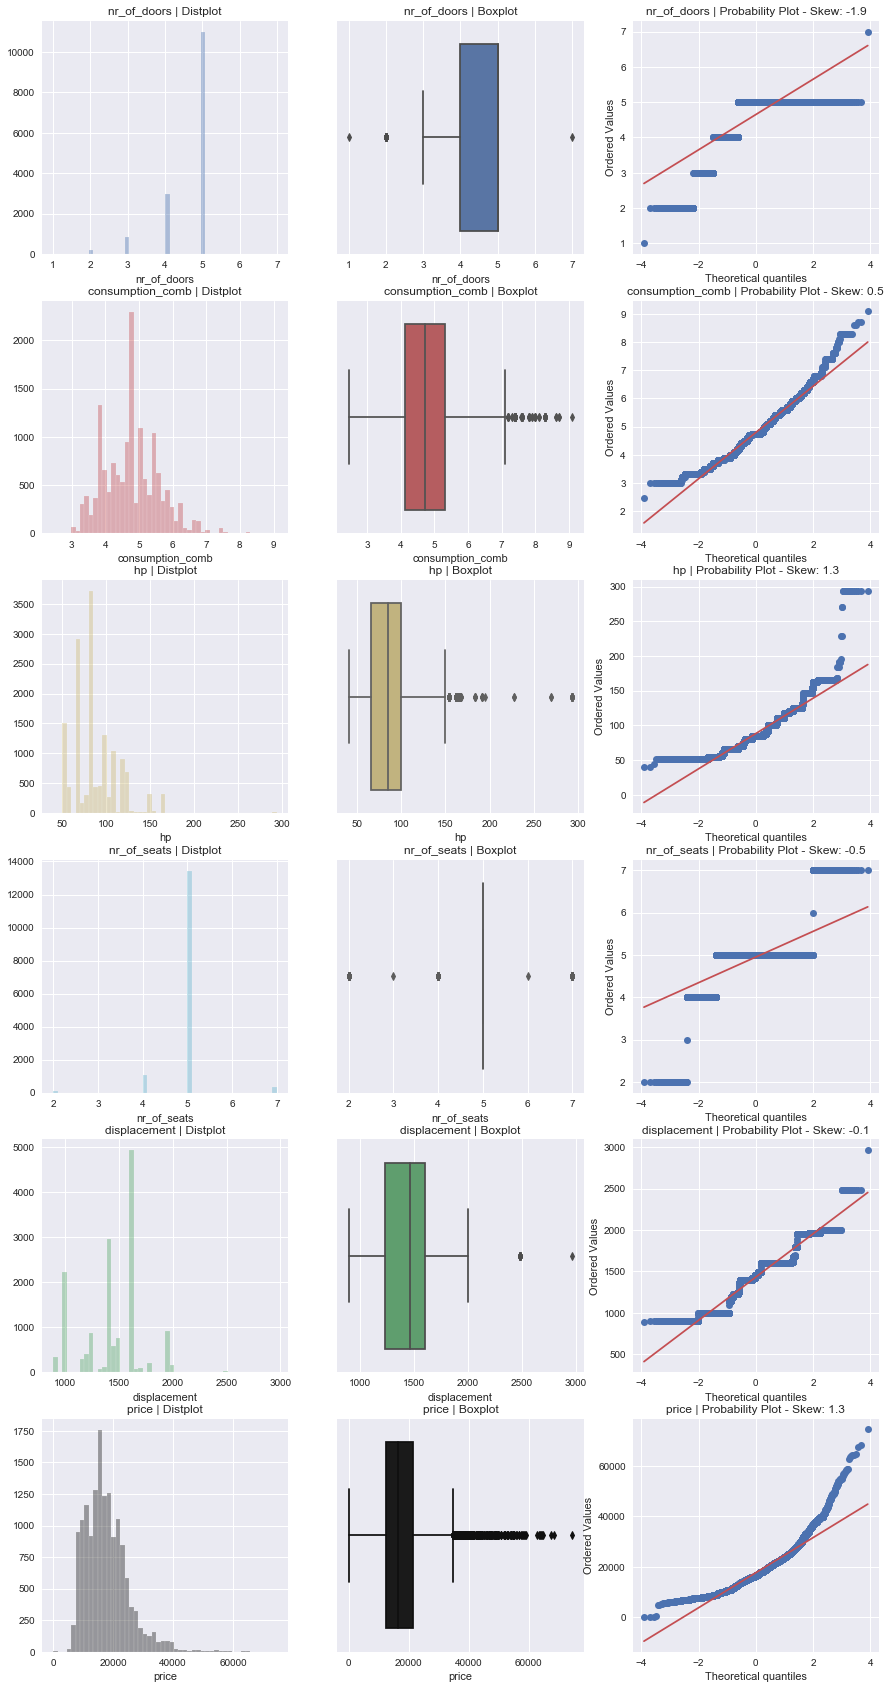

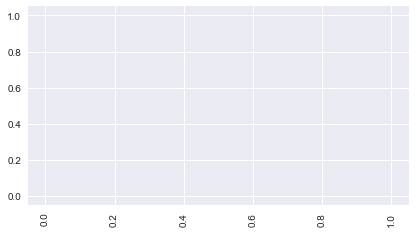

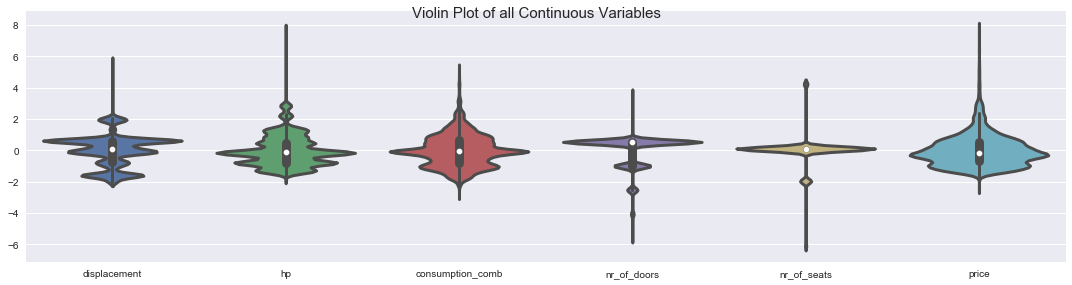

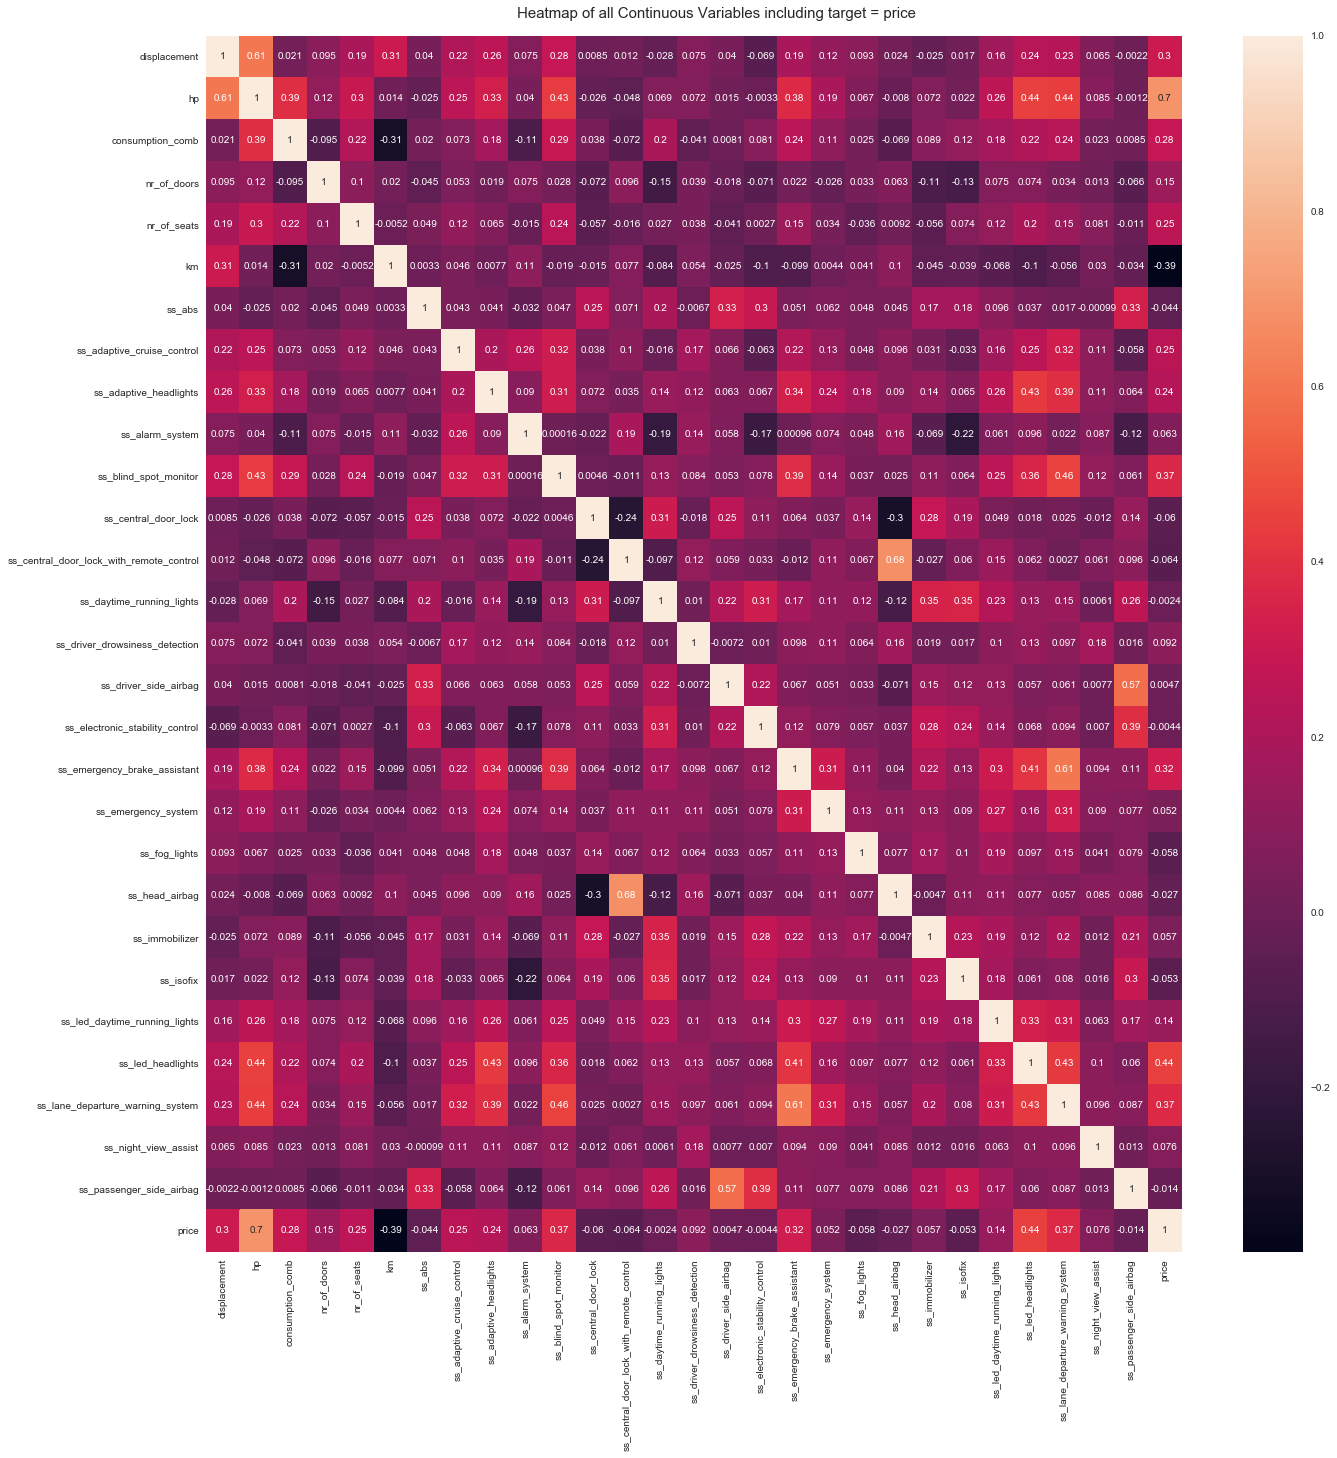

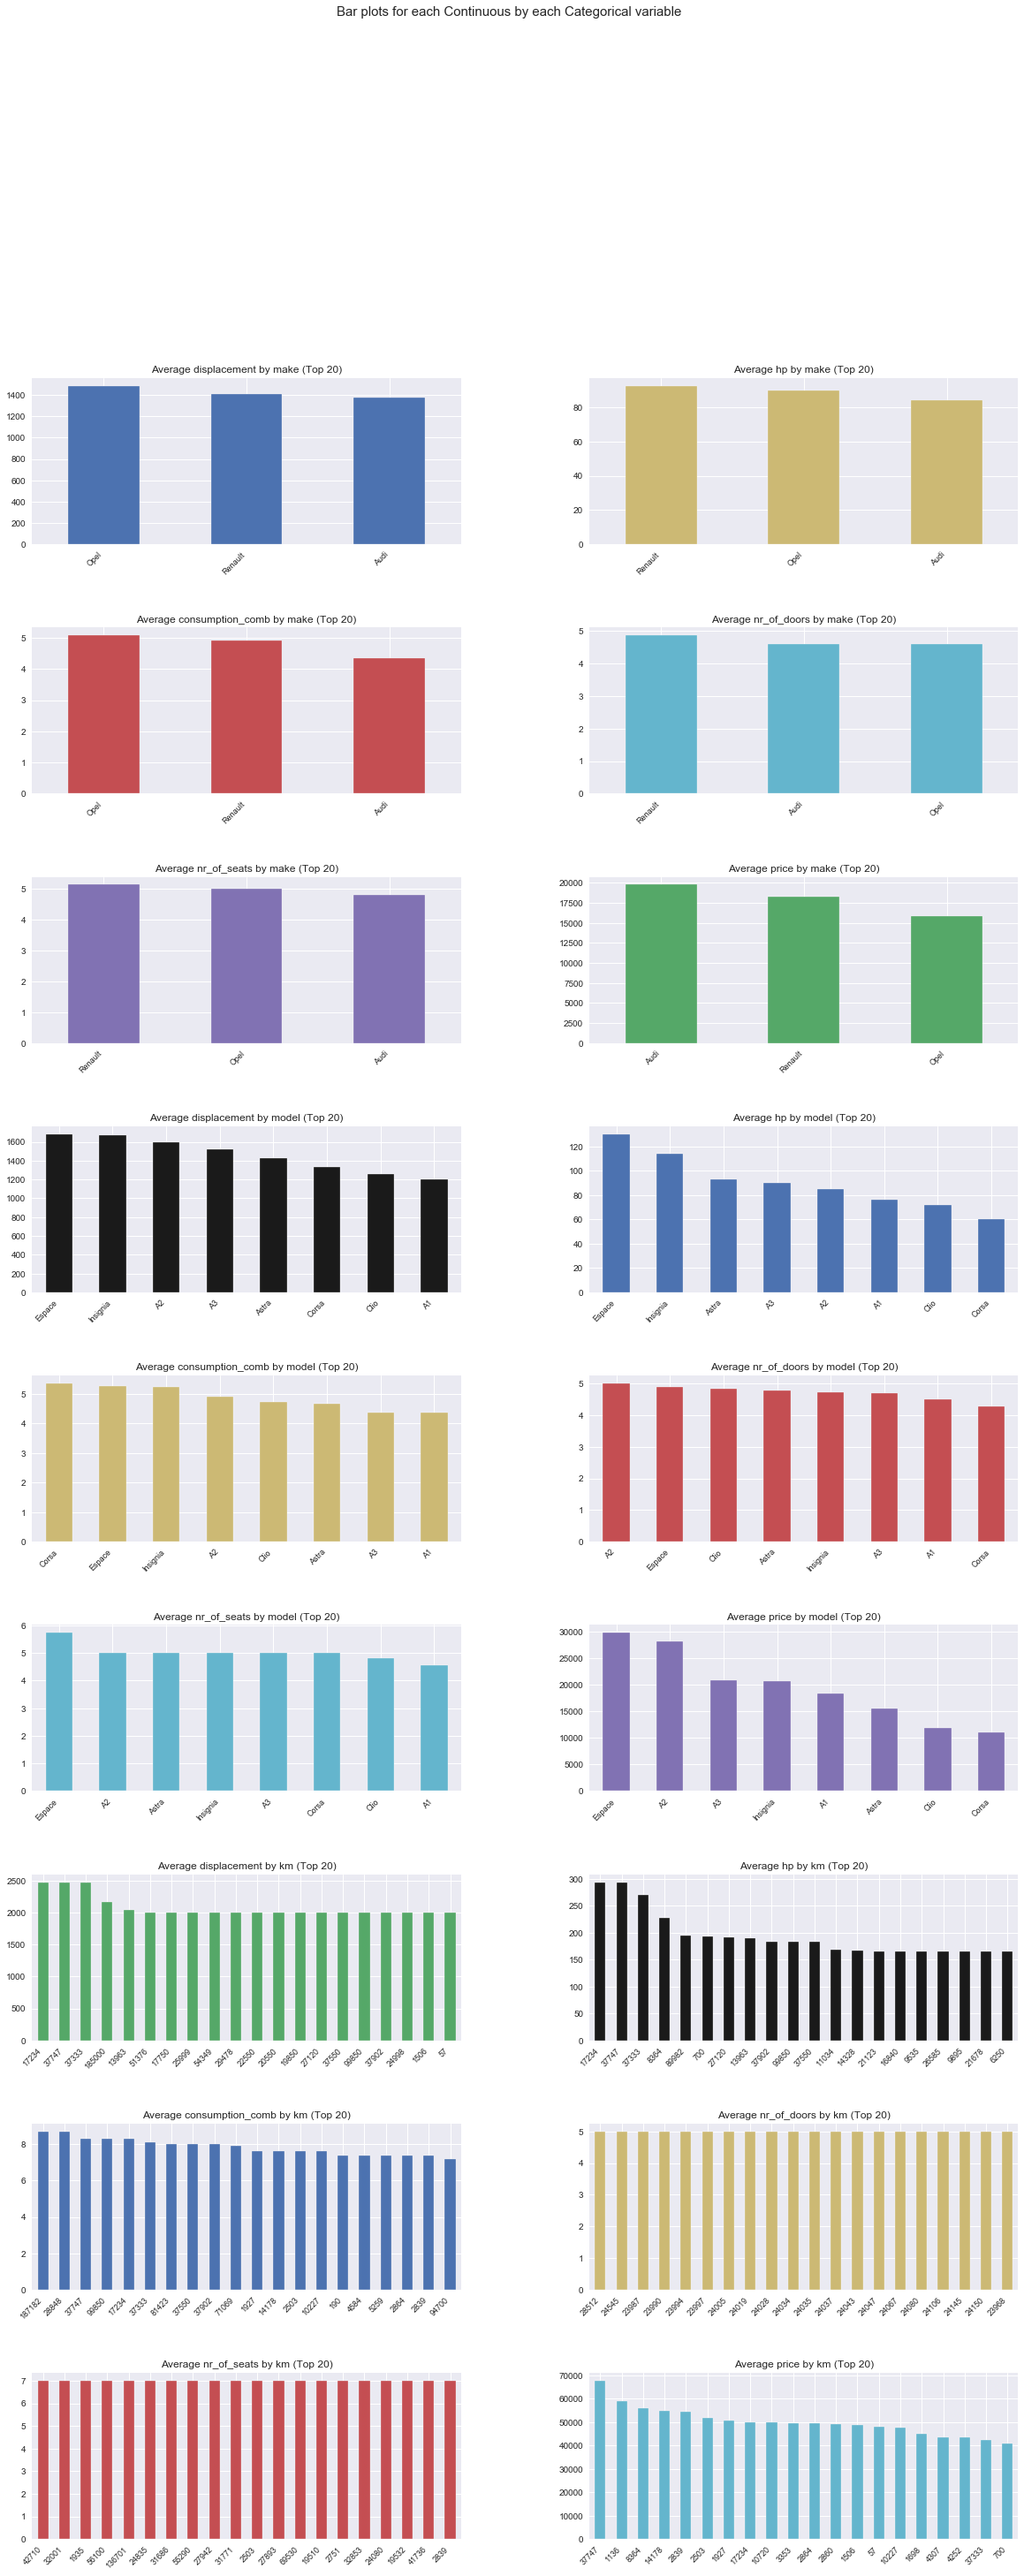

All Plots done
Time to run AutoViz (in seconds) = 111.713

 ###################### VISUALIZATION Completed ########################


In [129]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="price",
    dfte=df2,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=300000,
    max_cols_analyzed=30,
)

### RF Model Tuning

In [118]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [4,6,8],
              "min_samples_split": [2,4,6]}

In [120]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs =None, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_sa

[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   1.0s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] max_depth=3, max_features=4, min_samples_split=2, n_estimators=300 
[CV]  max_depth=3, max_features=4,

[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=3, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_sa

[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   1.1s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   1.1s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   1.1s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8, min_samples_split=4, n_estimators=300, total=   1.1s
[CV] max_depth=3, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=3, max_features=8,

[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_sa

[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   1.2s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   1.2s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   1.2s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4, min_samples_split=6, n_estimators=300, total=   1.2s
[CV] max_depth=5, max_features=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=4,

[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=8, min_samp

[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   1.1s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   1.1s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2, min_samples_split=2, n_estimators=300, total=   1.1s
[CV] max_depth=7, max_features=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=7, max_features=2,

[CV]  max_depth=7, max_features=4, min_samples_split=2, n_estimators=300, total=   1.4s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_features=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=7, max_features=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=4, min_sampl

[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=100 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   1.6s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6, min_samples_split=4, n_estimators=300, total=   1.6s
[CV] max_depth=7, max_features=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=6,

[CV]  max_depth=7, max_features=8, min_samples_split=4, n_estimators=300, total=   1.9s
[CV] max_depth=7, max_features=8, min_samples_split=4, n_estimators=300 
[CV]  max_depth=7, max_features=8, min_samples_split=4, n_estimators=300, total=   1.9s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=7, max_features=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_features=8, min_samp

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  5.6min finished


In [122]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 50}

In [125]:
rf_tuned = RandomForestRegressor(
                                max_features = 6,
                                min_samples_split = 6,
                                 n_estimators = 50)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9103398573282019 
 mae: 1394.1089846990674 
 mse: 4733467.681231647 
 rmse: 2175.653391795588


## XGBoost Regressor

In [131]:
X=df.drop(['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [132]:
import xgboost

In [133]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [135]:
y_pred = model_xg.predict(X_test)

In [136]:
eval_metrics(y_test, y_pred)

r2_score: 0.9547205053631843 
 mae: 933.5609744061145 
 mse: 2364018.482645035 
 rmse: 1537.5364979879453
